In this notebook we will demonstrate how to use AC-SVR to estimate different cell types proportions from gene expression profiles. 

# Simulated dataset

We will start by simulating mixture samples using Reference profiles from purified cells.
To do so, the datatset called "Abbas" in our paper is going to be used. It is accesible via the accession code [GSE11103](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE11103) on GEO and can also be found in the AC-SVR package. This dataset is composed of 4 different cell types: Jurkat, Raji, THP-1, IM-9 and for each of the cell type, there are 3 pure gene expression profiles. 

We start by loading the Reference matrix. 

In [20]:
from deconv.utils import semi_synth_data, rmse, mae
from deconv.deconv_methods import deconv_ssvr, SOLS, cibersort
import numpy as np
import pandas as pandas
import seaborn as sns
import matplotlib.pyplot as plt

dir_to_abbas = "/Users/quentin.klopfenstein/Documents/deconvolution_SSVR/Data/microarray/abbas/"
working_dir = "~/deconvolution_SSVR/Analysis/deconv/expes/microarray/"
dir_to_competitors = "~/deconvolution_SSVR/Analysis/deconv/deconv/competitors/"

Signature = pandas.read_csv(dir_to_abbas + "Signature.txt", header=0, index_col=0, delimiter="\t")
Reference = pandas.read_csv(dir_to_abbas + "Reference.txt", header=0, index_col=0, delimiter="\t")

cell_types = np.array(["Jurkat", "Jurkat", "Jurkat", "IM-9", "IM-9", "IM-9",
                       "Raji", "Raji", "Raji", "THP1", "THP1", "THP1"])
n_samples = 25

list_methods = ["cibersort", "sols", "AC-SVR"]

deconvolution_methods = {}
deconvolution_methods["cibersort"] = cibersort
deconvolution_methods["AC-SVR"] = deconv_ssvr
deconvolution_methods["sols"] = SOLS

genes_to_keep = Reference.index.isin(Signature.index)


The next step is to simulated the data using the Reference matrix.
We can use the **semi_synth_data** function which requires the number of desired samples as well as the cell 

In [32]:
Mixture, Ground_truth = semi_synth_data(
    np.array(Reference), n_samples, cell_types, sigma=7.5, noise_type="log_gaussian")

Estimated_proportions = {}

for method in list_methods:
    Estimated_proportions[method] = deconvolution_methods[method](np.array(Signature), Mixture[genes_to_keep, :])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=50000).  Consider pre-processing your data with StandardScaler

Iteration 1/10 ||Value outer criterion: 5.82e-02 ||norm grad 5.79e-05
Iteration 2/10 ||Value outer criterion: 5.81e-02 ||norm grad 1.20e-04
Iteration 3/10 ||Value outer criterion: 5.80e-02 ||norm grad 2.33e-04
Iteration 4/10 ||Value outer criterion: 5.78e-02 ||norm grad 3.41e-04
Iteration 5/10 ||Value outer criterion: 5.75e-02 ||norm grad 4.76e-04
Iteration 6/10 ||Value outer criterion: 5.74e-02 ||norm grad 1.44e-04
Iteration 7/10 ||Value outer criterion: 5.74e-02 ||norm grad 1.10e-06
Iteration 8/10 ||Value outer criterion: 5.74e-02 ||norm grad 2.24e-06
Iteration 9/10 ||Value outer criterion: 5.74e-02 ||norm grad 1.22e-05
Iteration 10/10 ||Value outer criterion: 5.74e-02 ||norm grad 1.08e-05
Iteration 1/10 ||Value outer criterion: 5.92e-02 ||norm grad 8.78e-05
Iteration 2/10 ||Value outer criterion: 5.91e-02 ||norm grad 1.96e-04
Iteration 3/10 ||Value outer criterion: 5.89e-02 ||norm grad 3.96e-04
Iteration 4/10 ||Value outer criterion: 5.84e-02 ||norm grad 8.19e-04
Iteration 5/10 ||Va

Iteration 8/10 ||Value outer criterion: 4.00e-02 ||norm grad 2.35e-04
Iteration 9/10 ||Value outer criterion: 4.00e-02 ||norm grad 1.63e-04
Iteration 10/10 ||Value outer criterion: 4.00e-02 ||norm grad 2.16e-04
Iteration 1/10 ||Value outer criterion: 4.61e-02 ||norm grad 9.56e-05
Iteration 2/10 ||Value outer criterion: 4.60e-02 ||norm grad 2.03e-04
Iteration 3/10 ||Value outer criterion: 4.58e-02 ||norm grad 4.21e-04
Iteration 4/10 ||Value outer criterion: 4.53e-02 ||norm grad 8.17e-04
Iteration 5/10 ||Value outer criterion: 4.48e-02 ||norm grad 6.00e-04
Iteration 6/10 ||Value outer criterion: 4.46e-02 ||norm grad 4.12e-07
Iteration 7/10 ||Value outer criterion: 4.46e-02 ||norm grad 3.94e-04
Iteration 8/10 ||Value outer criterion: 4.46e-02 ||norm grad 2.87e-04
Iteration 9/10 ||Value outer criterion: 4.46e-02 ||norm grad 6.97e-06
Iteration 10/10 ||Value outer criterion: 4.46e-02 ||norm grad 3.53e-05
Iteration 1/10 ||Value outer criterion: 5.43e-02 ||norm grad 2.22e-04
Iteration 2/10 ||V

Iteration 5/10 ||Value outer criterion: 3.68e-02 ||norm grad 2.20e-03
Iteration 6/10 ||Value outer criterion: 3.51e-02 ||norm grad 1.06e-03
Iteration 7/10 ||Value outer criterion: 3.50e-02 ||norm grad 1.90e-04
Iteration 8/10 ||Value outer criterion: 3.50e-02 ||norm grad 8.45e-07
Iteration 9/10 ||Value outer criterion: 3.50e-02 ||norm grad 3.32e-07
Iteration 10/10 ||Value outer criterion: 3.50e-02 ||norm grad 6.55e-07
Iteration 1/10 ||Value outer criterion: 4.78e-02 ||norm grad 1.78e-04
Iteration 2/10 ||Value outer criterion: 4.76e-02 ||norm grad 3.81e-04
Iteration 3/10 ||Value outer criterion: 4.72e-02 ||norm grad 7.03e-04
Iteration 4/10 ||Value outer criterion: 4.64e-02 ||norm grad 1.25e-03
Iteration 5/10 ||Value outer criterion: 4.52e-02 ||norm grad 1.57e-03
Iteration 6/10 ||Value outer criterion: 4.46e-02 ||norm grad 3.92e-04
Iteration 7/10 ||Value outer criterion: 4.46e-02 ||norm grad 2.13e-05
Iteration 8/10 ||Value outer criterion: 4.46e-02 ||norm grad 9.14e-07
Iteration 9/10 ||Va

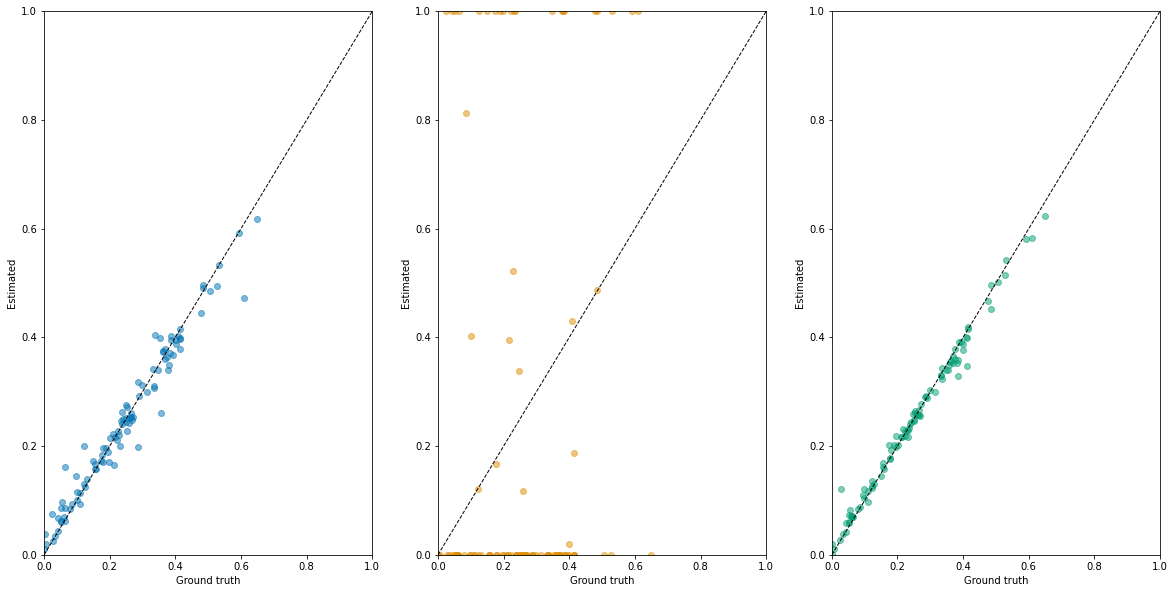

In [33]:
fig, axarr = plt.subplots(1, len(list_methods), sharex=False, sharey=False, figsize=[20, 10]) 
    
for i, method in enumerate(list_methods):
    axarr[i].scatter(
        Ground_truth.T.flatten(),
        Estimated_proportions[method].flatten(),
        color=sns.color_palette("colorblind")[i], alpha=0.5)
    axarr[i].plot(
        (0, 1.0), (0, 1.0), color="black", marker='',
        linestyle='--', linewidth=1)
    axarr[i].set_xlim((0, 1.0))
    axarr[i].set_ylim((0, 1.0))
    axarr[i].set_xlabel("Ground truth")
    axarr[i].set_ylabel("Estimated")